# Import libraries

In [11]:
from math import *
from sympy import *
from ipywidgets import *
from IPython.display import display,clear_output
import numpy as np
import matplotlib.pyplot as plt

# Styling

In [12]:
%%html
<style>
textarea, input {
     font-family: Cambria Math;
    text-align: center;
}
:root {
    --jp-ui-font-size1: 16px;
}
</style>

In [13]:
CSS = """
.output {
     font-family: Cambria Math;
    display: flex;
    align-items: center;
    justify-content:center;
    text-align: center;
}
.widget-label { min-width: 15ex !important; }
-button{
    background-color: #689e5f
}
"""

HTML('<style>{}</style>'.format(CSS))

HTML(value='<style>\n.output {\n     font-family: Cambria Math;\n    display: flex;\n    align-items: center;\…

 # Input processing and algorithms

In [14]:
#Parse input string to the right format
def get_func(s):
    import re
    # step1: trim all whitespaces
    s = re.sub(r'\s+',"",s).replace('e**','e^')
    #step2: convert e^() to exp(), e^__ to exp(x), ln__ to ln()
    s = re.sub(r"[e]\^\((\w*)",r"exp(\1",s) 
    s = re.sub('e\^([0-9a-z.]*)','exp(\g<1>)',s) 
    s = re.sub(r"ln([0-9a-z.()]*)",r'ln(\g<1>)',s) 
    #step3.1: add * between 2 consecutive alphabetical characters | a digit and an alphabetical character
    s = re.sub('(?i)(?<=[a-z0-9])(?=[a-z])',r'*',s) 
    #step3.2: add * between an alphabetical character and a digit
    s = re.sub('(?i)(?<=[a-z])(?=[0-9])',r'*',s) 
    #step3.3 add * between number and open bracket
    s = re.sub('(?<=[a-z0-9])(?=[([{])',r'*',s)
    #step3.4 add * between closing bracket and number or open bracket, fix error from step3
    s = re.sub('(?:(?<=[)])|(?<=[}])|(?<=[]]))(?:(?=([a-z0-9]))|(?=[({[]))',r'*',s)
    s = s.replace("l*n*","ln").replace("l*o*g*","log").replace("t*a*n*","tan").replace("c*o*s*","cos").replace("s*i*n*","sin").replace("e*x*p*","exp").replace("^","**").replace('−','-')
    return s
#Calculate possible self-intersect point and its tangent line's slope 
def get_intersect(x,y):
    import re
    from collections import Counter
    x_t = lambda t: eval(x)
    y_t = lambda t: eval(y)
    t_set=[]
    t =symbols('t')
    if degree(simplify(x),gen=t)<degree(simplify(y),gen=t):
        b_implicit=[re.search('(?<=a\:\s)(.*)(?=})',str(i)).group(0) for i in solve(f'({x.replace("t","a")})-({x.replace("t","b")})') if str(i)!='{a: b}']
        for sol in b_implicit:
            a_explicit = [i for i in solve(f'({y.replace("t",f"({sol})")})-({y.replace("t","b")})') if type(i)!=ComplexRootOf]
            b = symbols('b')
            func = sympify(sol)
            for j in a_explicit:
                if func.subs(b,j)!=j:
                    t_set.append(j)
        point_x = Counter([x_t(t) for t in t_set]).most_common(1)[0][0]
        point_y = Counter([y_t(t) for t in t_set]).most_common(1)[0][0]
        dydx = [diff(y, t).subs(t, i)/diff(x, t).subs(t, i) for i in t_set if x_t(i)==point_x]
        if 'I' in str(point_x) or 'I' in str(point_y):
            raise Exception("Invalid Imaginary Value") 
        return f'({point_x},{point_y})',dydx
    else:
        b_implicit=[re.search('(?<=a\:\s)(.*)(?=})',str(i)).group(0) for i in solve(f'({y.replace("t","a")})-({y.replace("t","b")})') if str(i)!='{a: b}']
        for sol in b_implicit: 
            a_explicit = [i for i in solve(f'({x.replace("t",f"({sol})")})-({x.replace("t","b")})') if type(i)!=ComplexRootOf]
            b = symbols('b')
            func = sympify(sol)
            for j in a_explicit:
                if func.subs(b,j)!=j:
                    t_set.append(j)
        point_x = Counter([x_t(t) for t in t_set]).most_common(1)[0][0]
        point_y = Counter([y_t(t) for t in t_set]).most_common(1)[0][0]
        dydx = [diff(y, t).subs(t, i)/diff(x, t).subs(t, i) for i in t_set if y_t(i)==point_y]
        if 'I' in str(point_x) or 'I' in str(point_y):
            raise Exception("Invalid Imaginary Value") 
        return f'({point_x},{point_y})',dydx
#Return tangent line of parametric curve at point (x0,y0) if provided the slope
def get_tangent(dydx,x0,y0):
    return f"{dydx}*x-{dydx}*{x0}+{y0}" 


# Plotting

Button(description='Compute', layout=Layout(width='auto'), style=ButtonStyle(button_color='lightgreen'), toolt…

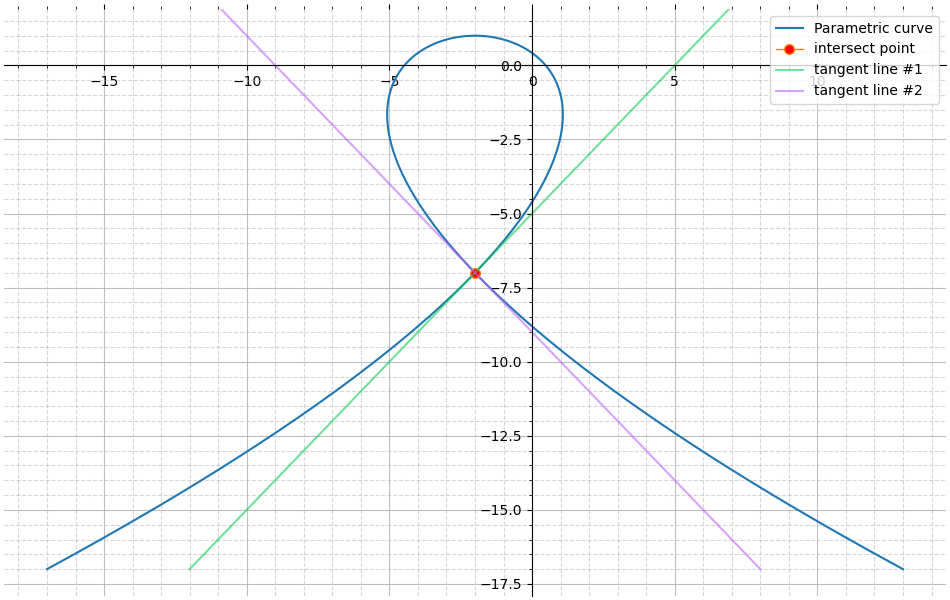

In [15]:
%matplotlib widget
#Create UI
x_expr = widgets.Text(value='t^3-4t-2',placeholder='Write parametric equation for x',description='x(t) =',layout = widgets.Layout(width='500px'),disabled=False)
y_expr = widgets.Text(value='-2t^2+1',placeholder='Write parametric equation for y',description='y(t) =',layout = widgets.Layout(width='500px'),disabled=False)
res_point = widgets.Text(value='',placeholder='Result',layout = widgets.Layout(width='auto'))
res_tangent1 = widgets.Text(value='',placeholder='Result',layout = widgets.Layout(width='auto'))
res_tangent2 = widgets.Text(value='',placeholder='Result',layout = widgets.Layout(width='auto'))
button_compute = widgets.Button(description='Compute',layout={'width': 'auto'},tooltip = "Light it up",style = dict(button_color = 'lightgreen'))
checkbox1 = widgets.Checkbox(description='Show point',value=True)
checkbox2 = widgets.Checkbox(description='Show line',value=True)
checkbox3 = widgets.Checkbox(description='Show line',value=True)
t1 = widgets.Text(value='-3',layout=Layout(display="flex", justify_content="center", width="50px"))
t2 = widgets.Text(value='3',layout=Layout(display="flex", justify_content="center", width="50px"))
label = widgets.Label(r"≤ 𝑡 ≤",layout=Layout(display="flex", justify_content="center", width="2px"))
#Display UI

display(widgets.VBox([x_expr,y_expr]))
display(widgets.HBox([t1,label,t2]))
display(button_compute)
#Global variable
fig,ax,x,y,x_coor,y_coor,iteration,line_1,line_2,point,tangent_1,tangent_2 = None,None,None,None,None,None,None,None,None,None,None,None
#Event handlers
def hide_point(change):
    if change.new==False:
        point.set_data([],[])
        fig.canvas.draw()
    elif change.new==True:
        point.set_data(eval(res_point.value)[0],eval(res_point.value)[1])
        fig.canvas.draw()
def hide_line1(change):
    if change.new==False:
        tangent_1.set_data([],[])
        fig.canvas.draw()
    elif change.new==True:
        tangent_1.set_data([i for i in iteration],[line_1(i) for i in iteration])
        fig.canvas.draw()
def hide_line2(change):
    if change.new==False:
        tangent_2.set_data([],[])
        fig.canvas.draw()
    elif change.new==True:
        tangent_2.set_data([i for i in iteration],[line_2(i) for i in iteration])
        fig.canvas.draw()
checkbox1.observe(hide_point,'value')
checkbox2.observe(hide_line1,'value')
checkbox3.observe(hide_line2,'value')
def compute(event):
    clear_output(wait=True)
    res_point.value, res_tangent1.value,res_tangent2.value = "","",""
    try:
        global fig,ax,x,y,x_coor,y_coor,line_1,line_2,iteration,point,tangent_1,tangent_2
        res_point.value,dydx = get_intersect(get_func(x_expr.value),get_func(y_expr.value)) 
        display(widgets.VBox([x_expr,y_expr])) 
        display(widgets.HBox([t1,label,t2]))
        display(widgets.HBox([widgets.VBox([widgets.Label(value="Intersection point"),res_point]),
                widgets.VBox([widgets.Label(value="Tangent line #1"),res_tangent1]),
                widgets.VBox([widgets.Label(value="Tangent line #2"),res_tangent2])]))
        display(widgets.HBox([checkbox1,checkbox2,checkbox3]))                     
        display(button_compute)      
        x0,y0 = eval(res_point.value)[0],eval(res_point.value)[1]
        res_tangent1.value = str(sympify(get_tangent(dydx[0],x0,y0)))
        res_tangent2.value = str(sympify(get_tangent(dydx[1],x0,y0)))      

        #essential setup    
        fig, ax = plt.subplots(constrained_layout=True, figsize=(9.5,6))
        fig.canvas.toolbar_position = 'bottom'
        fig.canvas.header_visible = False
        x = lambda t: eval(get_func(x_expr.value))
        y = lambda t: eval(get_func(y_expr.value))
        t_range = [t for t in np.linspace(-5,5, 1000)]
        iteration = [i for i in np.linspace(eval(res_point.value)[0]-10,eval(res_point.value)[0]+ 10, 1000)]
        if eval(t1.value)<eval(t2.value):
            t_range[:]=[t for t in np.linspace(eval(t1.value),eval(t2.value), 1000)]
        x_coor = [x(t) for t in t_range]
        y_coor = [y(t) for t in t_range]         
        line_1 = lambda x: eval(res_tangent1.value)       
        line_2 = lambda x: eval(res_tangent2.value)
        #plot parametric curve
        ax.plot(x_coor,y_coor,label="Parametric curve")
        #plot intersect point
        point,=ax.plot([],[],lw=1,label="intersect point", marker='o', markersize=7, markerfacecolor="red")
        if checkbox1.value:
            point.set_data(eval(res_point.value)[0],eval(res_point.value)[1])
            fig.canvas.draw()
        #plot tangent lines
        tangent_1, = ax.plot([],[],label="tangent line #1",color="#15cc55", alpha=0.6)
        tangent_2, = ax.plot([],[],label="tangent line #2",color="#c065fc", alpha=0.6)
        if checkbox2.value:
            tangent_1.set_data([i for i in iteration],[line_1(i) for i in iteration])
            fig.canvas.draw()
        if checkbox3.value:
            tangent_2.set_data([i for i in iteration],[line_2(i) for i in iteration])
            fig.canvas.draw()
        #customize graph   
        ax.spines['bottom'].set_position(('data',0))
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('default')
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('data',0)) 
        ax.minorticks_on()
        ax.grid(visible=True, which='major', axis='both', alpha=0.8)
        ax.grid(visible=True, which='minor', axis='both', alpha=0.5,linestyle='dashed')
        ax.autoscale(enable=True, axis='both', tight=None)
        ax.legend(loc=1, prop={'size': 10})
    except:
        clear_output(wait=True)
        display(widgets.VBox([x_expr,y_expr]))
        display(widgets.HBox([t1,label,t2]))
        display(button_compute)  
        display('CANNOT COMPUTE!')
button_compute.on_click(compute)